In [3]:
import pyspark
from os import listdir
from os.path import isfile, join
import boto3
import pandas as pd
from sagemaker import get_execution_role
from pyspark.sql.types import LongType, StringType, StructField, StructType, BooleanType, ArrayType, IntegerType

In [4]:
conf = pyspark.SparkConf().setAppName('odl').setMaster('local')
sc = pyspark.SparkContext(conf=conf)
sqlc = pyspark.sql.SQLContext(sc)
sc

<SparkContext master=local appName=odl>

In [5]:
sqlc

In [6]:
role = get_execution_role()
bucket='odl-spark19spds6003-001'
data_key = 'rc3my/train.csv'
data_location = 's3://{}/{}'.format(bucket, data_key)
pd.read_csv(data_location)

,age,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,new_foreign,club_id,big_club,new_signing
0,26,1,40.00,1183,10.5,26.5,0,2,1,1,1,0
1,31,1,15.00,7664,7.5,20.9,76,1,0,7,0,0
2,22,2,16.00,1011,5.0,1.6,0,2,1,5,1,0
3,24,1,50.00,3727,11.5,45.0,221,2,0,12,1,0
4,26,2,50.00,4042,5.0,13.8,83,2,0,5,1,1
5,25,1,35.00,1117,9.0,12.4,0,4,1,10,1,0
6,20,1,30.00,4254,10.5,15.2,67,3,0,11,1,1
7,28,2,12.00,110,4.5,0.9,0,2,1,16,0,0
8,29,1,65.00,4046,11.5,9.7,175,3,0,11,1,0
9,23,3,22.00,950,5.5,17.0,0,2,1,12,1,0


In [7]:
df = sqlc.createDataFrame(pd.read_csv(data_location))

In [8]:
df

DataFrame[age: bigint, position_cat: bigint, market_value: double, page_views: bigint, fpl_value: double, fpl_sel: double, fpl_points: bigint, region: bigint, new_foreign: bigint, club_id: bigint, big_club: bigint, new_signing: bigint]

In [10]:
parquetPath = '/home/ec2-user/SageMaker/tmp-pqt-rc3my'
df.write.parquet(parquetPath)

AnalysisException: 'path file:/home/ec2-user/SageMaker/tmp-pqt-rc3my already exists.;'

In [11]:
# prep list of files to transfer
files = [f for f in listdir(parquetPath) if isfile(join(parquetPath, f))]

s3 = boto3.resource('s3')
for f in files:
    #print('copying {} to {}'.format(parquetPath+'/'+f,"rc3my/"+f))
    s3.Bucket(bucket).upload_file(parquetPath+'/'+f, "rc3my/"+f)

In [12]:
df = sqlc.read.parquet(parquetPath)

In [13]:
df

DataFrame[age: bigint, position_cat: bigint, market_value: double, page_views: bigint, fpl_value: double, fpl_sel: double, fpl_points: bigint, region: bigint, new_foreign: bigint, club_id: bigint, big_club: bigint, new_signing: bigint]

In [14]:
bucket='odl-spark19spds6003-001/rc3my'
data_key = 'train.csv'
data_location = 's3://{}/{}'.format(bucket, data_key)
pddf = pd.read_csv(data_location)

In [15]:
pddf = pddf.dropna()

In [16]:
df = sqlc.createDataFrame(pddf)

In [17]:
display(df)

DataFrame[age: bigint, position_cat: bigint, market_value: double, page_views: bigint, fpl_value: double, fpl_sel: double, fpl_points: bigint, region: bigint, new_foreign: bigint, club_id: bigint, big_club: bigint, new_signing: bigint]

In [18]:
df.printSchema()

root
 |-- age: long (nullable = true)
 |-- position_cat: long (nullable = true)
 |-- market_value: double (nullable = true)
 |-- page_views: long (nullable = true)
 |-- fpl_value: double (nullable = true)
 |-- fpl_sel: double (nullable = true)
 |-- fpl_points: long (nullable = true)
 |-- region: long (nullable = true)
 |-- new_foreign: long (nullable = true)
 |-- club_id: long (nullable = true)
 |-- big_club: long (nullable = true)
 |-- new_signing: long (nullable = true)



In [19]:
df.take(5)

[Row(age=26, position_cat=1, market_value=40.0, page_views=1183, fpl_value=10.5, fpl_sel=26.5, fpl_points=0, region=2, new_foreign=1, club_id=1, big_club=1, new_signing=0),
 Row(age=31, position_cat=1, market_value=15.0, page_views=7664, fpl_value=7.5, fpl_sel=20.9, fpl_points=76, region=1, new_foreign=0, club_id=7, big_club=0, new_signing=0),
 Row(age=22, position_cat=2, market_value=16.0, page_views=1011, fpl_value=5.0, fpl_sel=1.6, fpl_points=0, region=2, new_foreign=1, club_id=5, big_club=1, new_signing=0),
 Row(age=24, position_cat=1, market_value=50.0, page_views=3727, fpl_value=11.5, fpl_sel=45.0, fpl_points=221, region=2, new_foreign=0, club_id=12, big_club=1, new_signing=0),
 Row(age=26, position_cat=2, market_value=50.0, page_views=4042, fpl_value=5.0, fpl_sel=13.8, fpl_points=83, region=2, new_foreign=0, club_id=5, big_club=1, new_signing=1)]

### Find the Pearson correlation between regressive factors fpl_value, fpl_points, page_views, and response factor market_value

In [20]:
print("Pearson's r(fpl_value,market_value) = {}".format(df.corr("fpl_value", "market_value")))
print("Pearson's r(fpl_points,market_value) = {}".format(df.corr("fpl_points", "market_value")))
print("Pearson's r(page_views,market_value) = {}".format(df.corr("page_views", "market_value")))

Pearson's r(fpl_value,market_value) = 0.7869349160777618
Pearson's r(fpl_points,market_value) = 0.5374665750584899
Pearson's r(page_views,market_value) = 0.6765409830507209


## fpl_value has the most significant Pearson correlation with respect to response variable.

In [21]:
df1 = df.select("fpl_value","market_value")

In [22]:
seed = 42
(testDF, trainingDF) = df1.randomSplit((0.20, 0.80), seed=seed)
print ('training set N = {}, test set N = {}'.format(trainingDF.count(),testDF.count()))

training set N = 182, test set N = 49


In [23]:
from pyspark.ml.linalg import Vectors, VectorUDT

In [24]:
# make a user defined function (udf)
sqlc.registerFunction("oneElementVec", lambda d: Vectors.dense([d]), returnType=VectorUDT())

# vectorize the data frames
trainingDF = trainingDF.selectExpr("market_value", "oneElementVec(fpl_value) as fpl_value")
testDF = testDF.selectExpr("market_value", "oneElementVec(fpl_value) as fpl_value")

print(testDF.orderBy(testDF.market_value.desc()).limit(5))

DataFrame[market_value: double, fpl_value: vector]


In [25]:
# rename to make ML engine happy
trainingDF = trainingDF.withColumnRenamed("market_value", "label").withColumnRenamed("fpl_value", "features")
testDF = testDF.withColumnRenamed("market_value", "label").withColumnRenamed("fpl_value", "features")

In [26]:
from pyspark.ml.regression import LinearRegression, LinearRegressionModel

lr = LinearRegression()
lrModel = lr.fit(trainingDF)

In [27]:
type(lrModel)

pyspark.ml.regression.LinearRegressionModel

In [28]:
predictionsAndLabelsDF = lrModel.transform(testDF)

print(predictionsAndLabelsDF.orderBy(predictionsAndLabelsDF.label.desc()).take(5))

[Row(label=50.0, features=DenseVector([11.5]), prediction=54.56564999133577), Row(label=45.0, features=DenseVector([9.0]), prediction=36.63693716164054), Row(label=35.0, features=DenseVector([9.0]), prediction=36.63693716164054), Row(label=35.0, features=DenseVector([7.0]), prediction=22.293966897884353), Row(label=30.0, features=DenseVector([8.0]), prediction=29.465452029762446)]


In [29]:
predictionsAndLabelsDF

DataFrame[label: double, features: vector, prediction: double]

In [30]:
from pyspark.ml.evaluation import RegressionEvaluator
eval = RegressionEvaluator()
print(eval.explainParams())

labelCol: label column name. (default: label)
metricName: metric name in evaluation - one of:
                       rmse - root mean squared error (default)
                       mse - mean squared error
                       r2 - r^2 metric
                       mae - mean absolute error. (default: rmse)
predictionCol: prediction column name. (default: prediction)


In [31]:
eval.setMetricName("rmse").evaluate(predictionsAndLabelsDF)

5.74095422393865

In [32]:
eval.setMetricName("r2").evaluate(predictionsAndLabelsDF)

0.7506525733598287

## Data Visualization

In [33]:
import plotly.plotly as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt

In [34]:
prediction = predictionsAndLabelsDF[2]

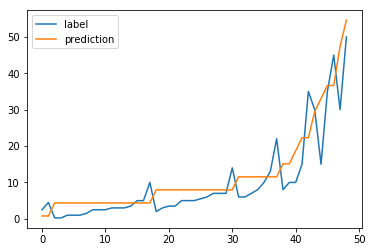

In [35]:
label = predictionsAndLabelsDF.toPandas()['label']
prediction=predictionsAndLabelsDF.toPandas()['prediction']
plt.plot(label)
plt.plot(prediction)
plt.legend()
plt.show()